In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_tr = pd.read_csv('application_train.csv')

In [3]:
y = app_tr.TARGET.values

In [4]:
app_tr.shape

(307511, 122)

In [5]:
del app_tr

In [6]:
app = pd.read_csv('application_ready.csv')

In [7]:
app.shape

(356255, 56)

In [8]:
app.columns

Index(['Unnamed: 0', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'LIVINGAREA_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'LIVINGAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CREDIT_INCOME_RATIO', 'DAYS_EMPLOYED_ISNULL', 'ANNUITY_

In [9]:
app.index = app['SK_ID_CURR']

In [10]:
app.drop(['Unnamed: 0', 'DAYS_BIRTH_BINS', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'SK_ID_CURR'], axis=1, inplace=True)

In [11]:
app.isnull().sum()

NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROCESS_START         0
ORGANIZATION_TYPE               0
EXT_SOURCE_1                    0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    2
YEARS_BEGINEXPLUATATION_AVG     0
LIVINGAREA_AVG                  0
YEARS_BEGINEXPLUATATION_MODE    0
LIVINGAREA_MODE                 0
YEARS_BEGINEXPLUATATION_MEDI    0
LIVINGAREA_MEDI                 0
TOTALAREA_MODE

In [12]:
app['EXT_SOURCE_3'].fillna(app['EXT_SOURCE_3'].mean(), inplace=True)

In [13]:
bureau = pd.read_csv('bureau_ready_for_appl.csv')

In [14]:
bureau.columns

Index(['Unnamed: 0', 'SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT',
       'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
       'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY', 'Active', 'Bad debt', 'Closed',
       'Sold', 'currency 1', 'currency 2', 'currency 3', 'currency 4',
       'Another type of loan', 'Car loan', 'Cash loan (non-earmarked)',
       'Consumer credit', 'Credit card', 'Interbank credit',
       'Loan for business development',
       'Loan for purchase of shares (margin lending)',
       'Loan for the purchase of equipment',
       'Loan for working capital replenishment', 'Microloan',
       'Mobile operator loan', 'Mortgage', 'Real estate loan',
       'Unknown type of loan', 'LATE_DAYS'],
      dtype='object')

In [15]:
bureau.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
bureau.isnull().sum()

SK_ID_CURR                                            0
SK_ID_BUREAU                                          0
DAYS_CREDIT                                           0
CREDIT_DAY_OVERDUE                                    0
DAYS_CREDIT_ENDDATE                                   0
DAYS_ENDDATE_FACT                                     0
AMT_CREDIT_MAX_OVERDUE                          1124488
CNT_CREDIT_PROLONG                                    0
AMT_CREDIT_SUM                                        0
AMT_CREDIT_SUM_DEBT                                   0
AMT_CREDIT_SUM_LIMIT                                  0
AMT_CREDIT_SUM_OVERDUE                                0
DAYS_CREDIT_UPDATE                                    0
AMT_ANNUITY                                           0
Active                                                0
Bad debt                                              0
Closed                                                0
Sold                                            

In [17]:
bureau['AMT_CREDIT_MAX_OVERDUE'].fillna(bureau['AMT_CREDIT_MAX_OVERDUE'].mean(), inplace=True)

In [18]:
bureau['LATE_DAYS'].fillna(bureau['LATE_DAYS'].mean(), inplace=True)

In [19]:
bureau_balance = pd.read_csv('bureau_balance_ready_for_appl.csv')

In [20]:
bureau_balance.columns

Index(['SK_ID_BUREAU', 'score', 'SK_ID_BUREAU.1', 'STATUS_X'], dtype='object')

In [21]:
bureau_balance.drop('SK_ID_BUREAU.1', inplace=True, axis=1)

In [22]:
bureau.head(15)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,Loan for business development,Loan for purchase of shares (margin lending),Loan for the purchase of equipment,Loan for working capital replenishment,Microloan,Mobile operator loan,Mortgage,Real estate loan,Unknown type of loan,LATE_DAYS
0,215354,5714462,-497,0,-153.000000,-153.000000,3825.417661,0,91323.00,0.000000,...,0,0,0,0,0,0,0,0,0,0.000000
1,215354,5714463,-208,0,1075.000000,-1017.437148,3825.417661,0,225000.00,171342.000000,...,0,0,0,0,0,0,0,0,0,463.035865
2,215354,5714464,-203,0,528.000000,-1017.437148,3825.417661,0,464323.50,137085.119952,...,0,0,0,0,0,0,0,0,0,463.035865
3,215354,5714465,-203,0,510.517362,-1017.437148,3825.417661,0,90000.00,137085.119952,...,0,0,0,0,0,0,0,0,0,463.035865
4,215354,5714466,-629,0,1197.000000,-1017.437148,77674.500000,0,2700000.00,137085.119952,...,0,0,0,0,0,0,0,0,0,463.035865
5,215354,5714467,-273,0,27460.000000,-1017.437148,0.000000,0,180000.00,71017.380000,...,0,0,0,0,0,0,0,0,0,463.035865
6,215354,5714468,-43,0,79.000000,-1017.437148,0.000000,0,42103.80,42103.800000,...,0,0,0,0,0,0,0,0,0,463.035865
7,162297,5714469,-1896,0,-1684.000000,-1710.000000,14985.000000,0,76878.45,0.000000,...,0,0,0,0,0,0,0,0,0,26.000000
8,162297,5714470,-1146,0,-811.000000,-840.000000,0.000000,0,103007.70,0.000000,...,0,0,0,0,0,0,0,0,0,29.000000
9,162297,5714471,-1146,0,-484.000000,-1017.437148,0.000000,0,4500.00,0.000000,...,0,0,0,0,0,0,0,0,0,463.035865


In [23]:
bureau.shape

(1716428, 38)

In [24]:
bureau = pd.merge(bureau, bureau_balance, on='SK_ID_BUREAU', how = 'left')

In [25]:
bureau.shape

(1716428, 40)

In [26]:
bureau.isnull().sum()

SK_ID_CURR                                           0
SK_ID_BUREAU                                         0
DAYS_CREDIT                                          0
CREDIT_DAY_OVERDUE                                   0
DAYS_CREDIT_ENDDATE                                  0
DAYS_ENDDATE_FACT                                    0
AMT_CREDIT_MAX_OVERDUE                               0
CNT_CREDIT_PROLONG                                   0
AMT_CREDIT_SUM                                       0
AMT_CREDIT_SUM_DEBT                                  0
AMT_CREDIT_SUM_LIMIT                                 0
AMT_CREDIT_SUM_OVERDUE                               0
DAYS_CREDIT_UPDATE                                   0
AMT_ANNUITY                                          0
Active                                               0
Bad debt                                             0
Closed                                               0
Sold                                                 0
currency 1

In [27]:
bureau['STATUS_X'].fillna(bureau['STATUS_X'].mean(), inplace=True)
bureau['score'].fillna(bureau['score'].mean(), inplace=True)

In [28]:
del bureau_balance

In [29]:
bureau.drop('SK_ID_BUREAU', axis=1, inplace=True)

In [30]:
bureau = bureau.groupby('SK_ID_CURR').mean()

In [31]:
app.shape

(356255, 51)

In [32]:
bureau.shape

(305811, 38)

In [33]:
app = pd.merge(app, bureau, on='SK_ID_CURR', how='left')

In [34]:
app.shape

(356255, 89)

In [35]:
app.isnull().sum().sum()

1916872

In [36]:
nan_cols = app.isnull().sum()[app.isnull().sum()>0].index

In [37]:
for col in nan_cols:
    app[col].fillna(app[col].median(), inplace=True)

In [38]:
app.isnull().sum().sum()

0

In [39]:
del bureau

In [40]:
prev_app = pd.read_csv('previous_application_ready.csv')

In [41]:
prev_app.columns

Index(['SK_ID_CURR', 'NFLAG_INSURED_ON_APPROVAL', 'DAYS_TERMINATION',
       'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE',
       'DAYS_FIRST_DRAWING', 'SK_ID_PREV', 'LATE_DAYS', 'EXTRA_DAYS', 'XNA',
       'high', 'low_action', 'low_normal', 'middle', 'CLIENT', 'HC', 'LIMIT',
       'SCO', 'SCOFR', 'SYSTEM', 'VERIF', 'XAP', 'XNA.1'],
      dtype='object')

In [42]:
prev_app_agg = prev_app.groupby('SK_ID_CURR').mean()

In [43]:
prev_app_agg.head(10)

,NFLAG_INSURED_ON_APPROVAL,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,SK_ID_PREV,LATE_DAYS,EXTRA_DAYS,XNA,...,middle,CLIENT,HC,LIMIT,SCO,SCOFR,SYSTEM,VERIF,XAP,XNA.1
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.000000,-1612.000000,-1619.000000,-1499.000000,-1709.000000,365243.0,1.369693e+06,-120.000000,-7.00,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0
100002,0.000000,-17.000000,-25.000000,125.000000,-565.000000,365243.0,1.038818e+06,-150.000000,-8.00,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0
100003,0.666667,-1047.333333,-1054.333333,-1004.333333,-1274.333333,365243.0,2.281150e+06,-50.000000,-7.00,0.000000,...,0.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0
100004,0.000000,-714.000000,-724.000000,-694.000000,-784.000000,365243.0,1.564014e+06,-30.000000,-10.00,0.000000,...,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0
100005,0.000000,-460.000000,-466.000000,-376.000000,-706.000000,365243.0,2.176837e+06,-90.000000,-6.00,0.500000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0
100006,0.000000,182481.750000,182477.500000,91584.000000,91066.500000,365243.0,1.932462e+06,90893.500000,-4.25,0.444444,...,0.111111,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.888889,0.0
100007,0.600000,72143.800000,72136.200000,-837.200000,-1263.200000,365243.0,2.157812e+06,72973.400000,-7.60,0.000000,...,0.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0
100008,0.250000,-872.750000,-1209.500000,-1044.500000,-1434.500000,365243.0,1.936735e+06,-165.000000,-336.75,0.200000,...,0.200000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0
100009,0.000000,51672.857143,51666.857143,-478.285714,-688.285714,365243.0,1.881798e+06,52145.142857,-6.00,0.000000,...,0.428571,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0


In [44]:
prev_app_agg['SK_ID_CURR'] = prev_app_agg.index

In [45]:
prev_app_agg.isnull().sum()

NFLAG_INSURED_ON_APPROVAL    1517
DAYS_TERMINATION             1517
DAYS_LAST_DUE                1517
DAYS_LAST_DUE_1ST_VERSION    1517
DAYS_FIRST_DUE               1517
DAYS_FIRST_DRAWING           1517
SK_ID_PREV                      0
LATE_DAYS                    1517
EXTRA_DAYS                   1517
XNA                             0
high                            0
low_action                      0
low_normal                      0
middle                          0
CLIENT                          0
HC                              0
LIMIT                           0
SCO                             0
SCOFR                           0
SYSTEM                          0
VERIF                           0
XAP                             0
XNA.1                           0
SK_ID_CURR                      0
dtype: int64

In [46]:
prev_app_agg.drop('SK_ID_PREV', axis=1, inplace=True)

In [47]:
for col in ['NFLAG_INSURED_ON_APPROVAL',  'DAYS_TERMINATION', 'DAYS_LAST_DUE',  'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING',  'LATE_DAYS',  'EXTRA_DAYS']:
    prev_app_agg[col].fillna(prev_app_agg[col].mean(), inplace=True)

In [48]:
app.shape

(356255, 89)

In [49]:
app = pd.merge(app, prev_app_agg, on='SK_ID_CURR', how='left')

c:\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 'SK_ID_CURR' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
app.shape

(356255, 112)

In [51]:
app.isnull().sum().sum()

382756

In [52]:
nan_cols = app.isnull().sum()[app.isnull().sum()>0].index

In [53]:
for col in nan_cols:
    app[col].fillna(app[col].median(), inplace=True)

In [54]:
del prev_app, prev_app_agg

In [55]:
insta = pd.read_csv('pos_cash_balance_and_installments.csv')

In [56]:
insta.columns

Index(['SK_ID_CURR', 'SK_ID_PREV', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF', 'PERCENT_COMPLETION',
       'Active', 'Amortized debt', 'Approved', 'Canceled', 'Completed',
       'Demand', 'Returned to the store', 'Signed', 'XNA',
       'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT',
       'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT',
       'LATE_PAYMENT_DAYS', 'YOKIAN_SCORE'],
      dtype='object')

In [57]:
insta.head()

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,PERCENT_COMPLETION,Active,Amortized debt,...,Signed,XNA,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,LATE_PAYMENT_DAYS,YOKIAN_SCORE
0,100001.0,1.584045e+06,-72.555556,4.000000,1.444444,0.777778,0.777778,0.638889,0.777778,0.0,...,0.000000,0.0,1.125000,2.750000,-2275.000000,-2280.916667,5647.200000,5647.200000,-5.916667,0.0
1,100002.0,1.038818e+06,-10.000000,24.000000,15.000000,0.000000,0.000000,0.375000,1.000000,0.0,...,0.000000,0.0,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,-20.421053,0.0
2,100003.0,2.297665e+06,-43.785714,10.107143,5.785714,0.000000,0.000000,0.455357,0.928571,0.0,...,0.000000,0.0,1.047619,4.666667,-1164.333333,-1171.781746,78558.479286,78558.479286,-7.448413,0.0
3,100004.0,1.564014e+06,-25.500000,3.750000,2.250000,0.000000,0.000000,0.437500,0.750000,0.0,...,0.000000,0.0,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000,-7.666667,0.0
4,100005.0,2.495675e+06,-20.000000,11.727273,7.181818,0.000000,0.000000,0.401515,0.818182,0.0,...,0.090909,0.0,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000,-23.555556,0.0


In [58]:
insta.drop('SK_ID_PREV', inplace=True, axis=1)

In [59]:
insta.isnull().sum()

SK_ID_CURR                   0
MONTHS_BALANCE            2866
CNT_INSTALMENT            2866
CNT_INSTALMENT_FUTURE     2866
SK_DPD                    2866
SK_DPD_DEF                2866
PERCENT_COMPLETION        2866
Active                    2866
Amortized debt            2866
Approved                  2866
Canceled                  2866
Completed                 2866
Demand                    2866
Returned to the store     2866
Signed                    2866
XNA                       2866
NUM_INSTALMENT_VERSION     531
NUM_INSTALMENT_NUMBER      531
DAYS_INSTALMENT            531
DAYS_ENTRY_PAYMENT         540
AMT_INSTALMENT             531
AMT_PAYMENT                540
LATE_PAYMENT_DAYS          540
YOKIAN_SCORE               540
dtype: int64

In [60]:
for col in insta.columns:
    insta[col].fillna(insta[col].median(), inplace=True)

In [61]:
app.shape

(356255, 112)

In [62]:
app = pd.merge(app, insta, on='SK_ID_CURR', how='left')

In [63]:
app.shape

(356255, 135)

In [64]:
app.isnull().sum().sum()

371151

In [65]:
for  col in app.isnull().sum()[app.isnull().sum()>0].index:
    app[col].fillna(app[col].median(), inplace=True)

In [66]:
del insta

In [67]:
credit = pd.read_csv('credit_card_balance_ready_to_attach_to_appl.csv')

In [68]:
credit.head()

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,Active,Approved,Completed,Demand,Refused,Sent proposal,Signed
0,100006,1489396.0,-3.5,0.000000,270000.000000,5961.324822,0.000000,288.169582,2968.804848,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,100011,1843384.0,-38.5,54482.111149,164189.189189,2432.432432,2432.432432,0.000000,0.000000,3950.599988,...,25.700339,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,100013,2038692.0,-48.5,18159.919219,131718.750000,6325.707801,5953.125000,18.010599,185.550303,1606.619259,...,18.872662,0.010417,0.010417,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,100021,2594025.0,-10.0,0.000000,675000.000000,5961.324822,0.000000,288.169582,2968.804848,0.000000,...,0.000000,0.000000,0.000000,0.411765,0.0,0.588235,0.0,0.0,0.0,0.0
4,100023,1499902.0,-7.5,0.000000,135000.000000,5961.324822,0.000000,288.169582,2968.804848,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [69]:
credit.drop('SK_ID_PREV', inplace=True, axis=1)

In [70]:
credit.isnull().sum().sum()

0

In [71]:
app.shape

(356255, 135)

In [72]:
app = pd.merge(app, credit, on='SK_ID_CURR', how='left')

In [73]:
app.shape

(356255, 162)

In [74]:
app.isnull().sum().sum()

6822819

In [75]:
for  col in app.isnull().sum()[app.isnull().sum()>0].index:
    app[col].fillna(app[col].median(), inplace=True)

In [76]:
app = pd.get_dummies(app)

In [77]:
app.shape

(356255, 230)

In [12]:
app = pd.read_csv('ready_for_model_building_appl.csv')

In [13]:
app_tr = app.iloc[:307511, :]

In [14]:
app_ts = app.iloc[307511:, :]

In [15]:
X = app_tr.values

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.1)

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
simple_rf = RandomForestClassifier()

In [51]:
simple_rf.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
roc_auc_score(y_tr, simple_rf.predict_proba(X_tr)[:, 1])

0.9997875177962385

In [53]:
roc_auc_score(y_ts, simple_rf.predict_proba(X_ts)[:, 1])

0.6476147338704396

In [ ]:
simple_rf.score(X_ts, y_ts)

In [87]:
del simple_rf

In [21]:
from sklearn.metrics import make_scorer

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
from sklearn.metrics import roc_curve

In [ ]:
ns = [10,30,50,80,100,120,150,180,200,220]
train_auc = []
test_auc = []
for n in ns:
    rf = RandomForestClassifier(n_estimators = n, n_jobs=5)
    rf.fit(X_tr, y_tr)
    y_hat_tr = rf.predict_proba(X_tr)[:, 1]
    y_hat_ts = rf.predict_proba(X_ts)[:, 1]
    train_auc.append(roc_auc_score(y_tr, y_hat_tr))
    test_auc.append(roc_auc_score(y_ts, y_hat_ts))

In [ ]:

fig = plt.figure(figsize=(16,16))
plt.plot(ns, train_auc, label='train')
plt.plot(ns, test_auc, label='test')
plt.legend()
plt.show()

In [ ]:
params = {'n_estimators':[200],
         'max_depth':[13],
         'min_impurity_decrease':[0.00001],
         'min_samples_leaf':[8],
         'min_samples_split':[9]
         }

In [ ]:
params = {'n_estimators':[200],
         'max_depth':[13],
         'min_impurity_decrease':[0.00001],
         'min_samples_leaf':[9],
         'min_samples_split':[10]
         }

In [ ]:
grid_rf = GridSearchCV(estimator=RandomForestClassifier(n_jobs=5), param_grid=params, cv=3, scoring = make_scorer(roc_auc_score), verbose=1, n_jobs=1)

In [ ]:
grid_rf.fit(X_tr, y_tr)

In [ ]:
grid_rf.best_score_

In [ ]:
grid_rf.best_params_

In [ ]:
roc_auc_score(y_tr, grid_rf.best_estimator_.predict_proba(X_tr)[:, 1])

In [ ]:
roc_auc_score(y_ts, grid_rf.best_estimator_.predict_proba(X_ts)[:, 1])

In [ ]:
roc_auc_score(y_tr, grid_rf.best_estimator_.predict_proba(X_tr)[:, 1])

In [ ]:
roc_auc_score(y_ts, grid_rf.best_estimator_.predict_proba(X_ts)[:, 1])

In [ ]:
del grid_rf

In [24]:
best_rf = RandomForestClassifier(n_estimators=250, max_depth=13, min_impurity_decrease=0.00001, min_samples_leaf=8, min_samples_split=9)

In [25]:
best_rf.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=1e-05, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
roc_auc_score(y_tr, best_rf.predict_proba(X_tr)[:, 1])

0.8157653707917668

In [27]:
roc_auc_score(y_ts, best_rf.predict_proba(X_ts)[:, 1])

0.7517048623902153

In [107]:
import pickle

In [108]:
pickle.dump(best_rf, open('cross_validated_random_forest.pickle', 'wb'))

In [49]:
submission = pd.read_csv('sample_submission.csv')

In [50]:
submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [95]:
submission['TARGET'] = best_rf.predict_proba(app_ts.values)[:, 1]

In [96]:
submission.to_csv('submission_best_rf.csv', index=False)

In [28]:
feat_imp = best_rf.feature_importances_

In [29]:
i = 0
for col in app.columns:
    print('{}:    {}'.format(col, feat_imp[i]))
    i = i+1

Unnamed: 0:    0.005358673662788894
SK_ID_CURR:    0.00545861900978449
CNT_CHILDREN:    0.0007634545715509647
AMT_INCOME_TOTAL:    0.0038465231040656477
AMT_CREDIT:    0.007390620259462592
AMT_ANNUITY_x:    0.007099997823745207
AMT_GOODS_PRICE:    0.010185656800828119
REGION_POPULATION_RELATIVE:    0.006163663476115386
DAYS_BIRTH:    0.015924009732707623
DAYS_EMPLOYED:    0.009872582426141991
DAYS_REGISTRATION:    0.007126154820044118
DAYS_ID_PUBLISH:    0.007524224652361234
OWN_CAR_AGE:    0.002866559058778217
CNT_FAM_MEMBERS:    0.0008901803137882805
HOUR_APPR_PROCESS_START:    0.003778431647328824
EXT_SOURCE_1:    0.03458944195220439
EXT_SOURCE_2:    0.11233826076723591
EXT_SOURCE_3:    0.09772451132328615
YEARS_BEGINEXPLUATATION_AVG:    0.005387289387769315
LIVINGAREA_AVG:    0.0050754573777975496
YEARS_BEGINEXPLUATATION_MODE:    0.005025791985527347
LIVINGAREA_MODE:    0.004704907760408256
YEARS_BEGINEXPLUATATION_MEDI:    0.005460929951103282
LIVINGAREA_MEDI:    0.0051222822970965

In [30]:
dic = dict(zip(app.columns, feat_imp))

In [31]:
dic_sorted = sorted(dic.items(), key=lambda kv:kv[1])

In [32]:
dic_sorted

[('DAYS_EMPLOYED_ISNULL', 0.0),
 ('AMT_ANNUITY_ISNULL', 0.0),
 ('Bad debt', 0.0),
 ('currency 4', 0.0),
 ('Cash loan (non-earmarked)', 0.0),
 ('Interbank credit', 0.0),
 ('Loan for purchase of shares (margin lending)', 0.0),
 ('Loan for the purchase of equipment', 0.0),
 ('Mobile operator loan', 0.0),
 ('Real estate loan', 0.0),
 ('Unknown type of loan', 0.0),
 ('Amortized debt', 0.0),
 ('Canceled', 0.0),
 ('XNA_y', 0.0),
 ('Approved_y', 0.0),
 ('Demand_y', 0.0),
 ('Refused', 0.0),
 ('Sent proposal', 0.0),
 ('CODE_GENDER_XNA', 0.0),
 ('NAME_EDUCATION_TYPE_Academic degree', 0.0),
 ('NAME_FAMILY_STATUS_Unknown', 0.0),
 ('ORGANIZATION_TYPE_Cleaning', 0.0),
 ('OCCUPATION_TYPE_HR staff', 2.7118779733434188e-06),
 ('currency 3', 2.824298606753599e-06),
 ('ORGANIZATION_TYPE_Security Ministries', 3.335901790344767e-06),
 ('currency 2', 4.112120508693831e-06),
 ('ORGANIZATION_TYPE_Rare 2', 5.348306005366169e-06),
 ('OCCUPATION_TYPE_Secretaries', 5.819550316552193e-06),
 ('OCCUPATION_TYPE_IT sta

In [35]:
dic_sorted = dict(dic_sorted)

In [36]:
feat_selec = []
i = 0
for col in app.columns:
    if dic_sorted[col]>=0.001:
        feat_selec.append(col)
        print(col)
        i = i+1
print(i)

Unnamed: 0
SK_ID_CURR
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY_x
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
HOUR_APPR_PROCESS_START
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
YEARS_BEGINEXPLUATATION_AVG
LIVINGAREA_AVG
YEARS_BEGINEXPLUATATION_MODE
LIVINGAREA_MODE
YEARS_BEGINEXPLUATATION_MEDI
LIVINGAREA_MEDI
TOTALAREA_MODE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_YEAR
CREDIT_INCOME_RATIO
ANNUITY_INCOME_RATIO
CREDIT_GOODS_PRICE_DIFF
ENTIRE_INCOME
CREDIT_ENTIRE_INCOME_RATIO
ANNUITY_ENTIRE_INCOME_RATIO
INCOME_PER_CHILD
INCOME_PER_FAM_MEMBER
ENTIRE_INCOME_PER_FAM_MEMBER
ENTIRE_INCOME_PER_CHILD
AMT_REQ_CREDIT_BUREAU_TOTAL
AMT_REQ_CREDIT_BUREAU_EMA
DAYS_CREDIT
CREDIT_DAY_OVERDUE
DAYS_CREDIT_ENDDATE
DAYS_ENDDATE_FACT
AMT_CREDIT_MAX_OVERDUE
AMT_CREDIT_SUM
AMT_CREDIT_SUM_DEBT
AMT_CREDIT_SUM_LIMIT
AMT_CREDIT_SUM_OVERDUE
DAYS_CREDI

In [97]:
X = app_tr[feat_selec].values

In [98]:
X_sub = app_ts[feat_selec].values

In [99]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.15)

In [100]:
from xgboost.sklearn import XGBClassifier

In [40]:
simple_xgbc = XGBClassifier()

In [41]:
simple_xgbc.fit(X_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [42]:
roc_auc_score(y_tr, simple_xgbc.predict_proba(X_tr)[:, 1])

0.7766587056221339

In [43]:
roc_auc_score(y_ts, simple_xgbc.predict_proba(X_ts)[:, 1])

0.7668186213052262

In [109]:
pickle.dump(simple_xgbc, open('simple_xgbc.pickle', 'wb'))

In [101]:
submission['TARGET'] = simple_xgbc.predict_proba(X_sub)[:,1]

In [102]:
submission.to_csv('simple_xgbc_submission.csv', index=False)

In [130]:
ns = [100,180,200,220, 250, 280, 300, 320]
train_auc = []
test_auc = []
for n in ns:
    rf = XGBClassifier(n_estimators = n, n_jobs=5)
    rf.fit(X_tr, y_tr)
    y_hat_tr = rf.predict_proba(X_tr)[:, 1]
    y_hat_ts = rf.predict_proba(X_ts)[:, 1]
    train_auc.append(roc_auc_score(y_tr, y_hat_tr))
    test_auc.append(roc_auc_score(y_ts, y_hat_ts))

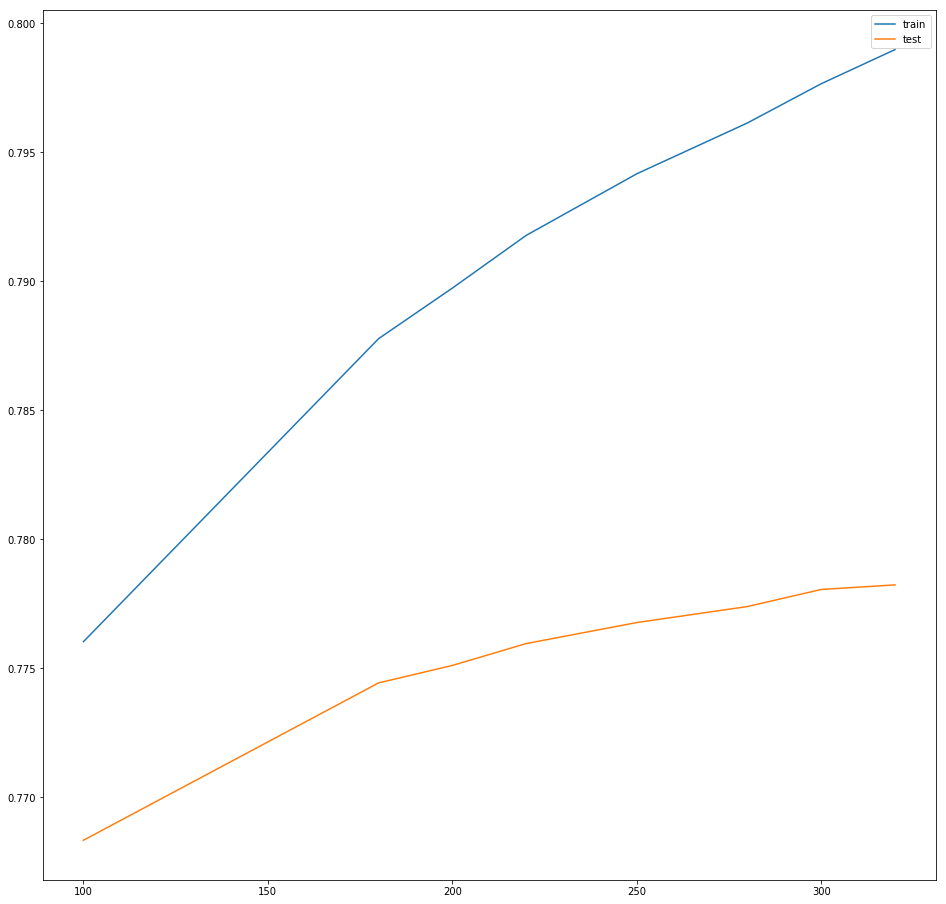

In [131]:

fig = plt.figure(figsize=(16,16))
plt.plot(ns, train_auc, label='train')
plt.plot(ns, test_auc, label='test')
plt.legend()
plt.show()

In [132]:
ns = [220, 250, 280, 300, 320, 350, 380, 400, 450]
train_auc = []
test_auc = []
for n in ns:
    rf = XGBClassifier(n_estimators = n, n_jobs=5)
    rf.fit(X_tr, y_tr)
    y_hat_tr = rf.predict_proba(X_tr)[:, 1]
    y_hat_ts = rf.predict_proba(X_ts)[:, 1]
    train_auc.append(roc_auc_score(y_tr, y_hat_tr))
    test_auc.append(roc_auc_score(y_ts, y_hat_ts))

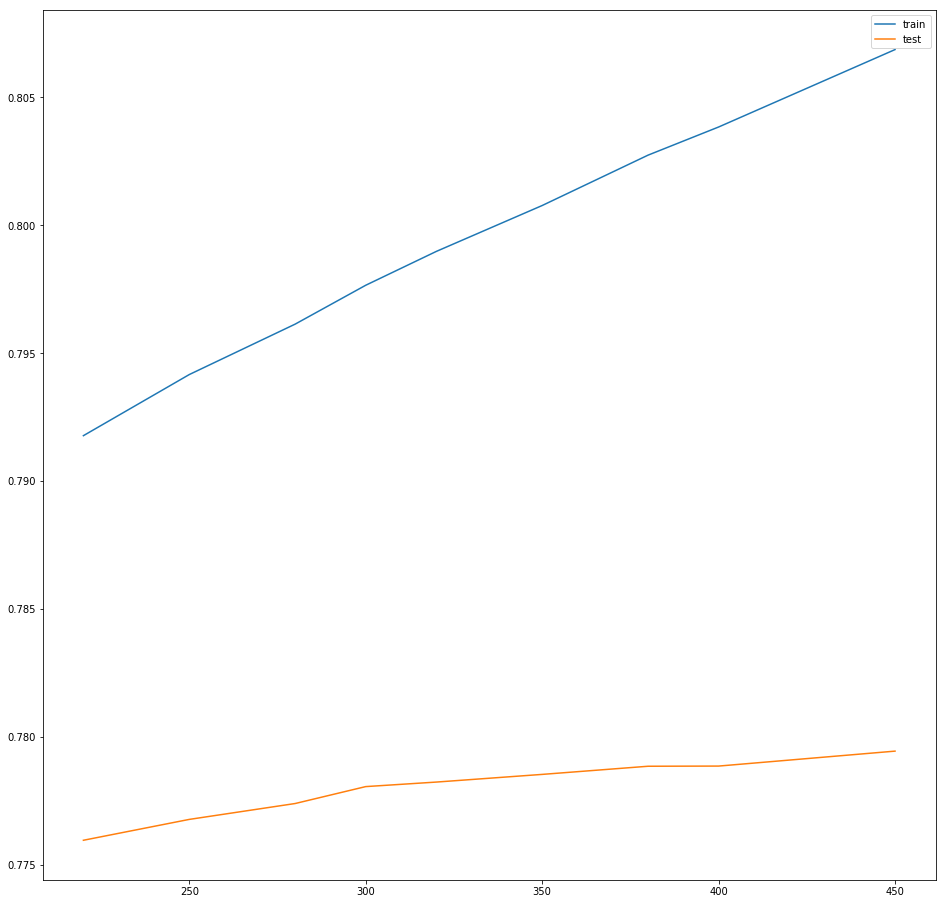

In [133]:

fig = plt.figure(figsize=(16,16))
plt.plot(ns, train_auc, label='train')
plt.plot(ns, test_auc, label='test')
plt.legend()
plt.show()

In [134]:
ns = [350, 380, 400, 450, 480, 500, 550, 600, 650, 700, 750]
train_auc = []
test_auc = []
for n in ns:
    rf = XGBClassifier(n_estimators = n, n_jobs=5)
    rf.fit(X_tr, y_tr)
    y_hat_tr = rf.predict_proba(X_tr)[:, 1]
    y_hat_ts = rf.predict_proba(X_ts)[:, 1]
    train_auc.append(roc_auc_score(y_tr, y_hat_tr))
    test_auc.append(roc_auc_score(y_ts, y_hat_ts))

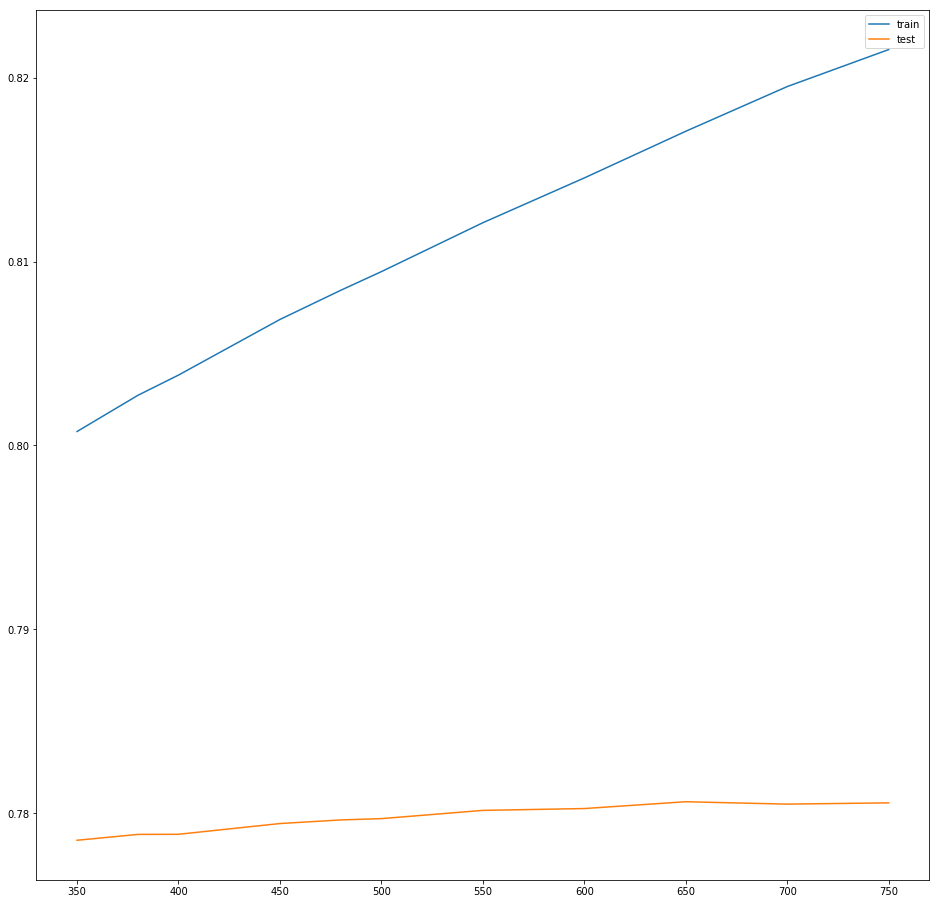

In [135]:
fig = plt.figure(figsize=(16,16))
plt.plot(ns, train_auc, label='train')
plt.plot(ns, test_auc, label='test')
plt.legend()
plt.show()

In [173]:
params = {'base_score':[0.5],
         'colsample_bylevel':[0.7],
         'colsample_bytree':[0.8],
         'gamma':[8],
         'learning_rate':[0.1],
         'max_delta_step':[7],
         'max_depth':[4],
         'min_child_weight':[4],
         'n_estimators':[800],
         'reg_alpha':[6],
         'reg_lambda':[9]}

In [44]:
xgbc_selec = XGBClassifier(base_score=0.5, colsample_bylevel=0.7, colsample_bytree=0.8, gamma=6, learning_rate=0.1, max_delta_step=7, max_depth=4, min_child_weight=4, n_estimators=800, reg_alpha=5, reg_lambda=7)

In [45]:
xgbc_selec.fit(X_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.8, gamma=6, learning_rate=0.1, max_delta_step=7,
       max_depth=4, min_child_weight=4, missing=None, n_estimators=800,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=5, reg_lambda=7, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [47]:
roc_auc_score(y_tr, xgbc_selec.predict_proba(X_tr)[:,1])

0.8256354629627725

In [48]:
roc_auc_score(y_ts, xgbc_selec.predict_proba(X_ts)[:,1])

0.779390201805803

In [110]:
pickle.dump(xgbc_selec, open('xgbc_selected_cross_validated.pickle', 'wb'))

In [103]:
submission['TARGET'] = xgbc_selec.predict_proba(X_sub)[:,1]

In [104]:
submission.to_csv('xgbc_best_selected.csv', index=False)

In [167]:
params = {'base_score':[0.5],
         'colsample_bylevel':[0.7],
         'colsample_bytree':[0.8],
         'gamma':[6],
         'learning_rate':[0.1],
         'max_delta_step':[7],
         'max_depth':[4],
         'min_child_weight':[4],
         'n_estimators':[800],
         'reg_alpha':[5],
         'reg_lambda':[7]}

In [64]:
X_full = app_tr.values

In [65]:
X_fulltr, X_fullts, y_tr, y_ts = train_test_split(X_full, y, test_size=0.15)

In [78]:
xgbc_best_full = XGBClassifier(base_score=0.5, colsample_bylevel=0.7, colsample_bytree=0.8, gamma=6, learning_rate=0.1, max_delta_step=7, max_depth=5, min_child_weight=5, n_estimators=800, reg_alpha=6, reg_lambda=10, n_jobs=-1)

In [79]:
xgbc_best_full.fit(X_fulltr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.8, gamma=6, learning_rate=0.1, max_delta_step=7,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=800,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=6, reg_lambda=10, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [80]:
roc_auc_score(y_tr, xgbc_best_full.predict_proba(X_fulltr)[:,1])

0.7824425935883748

In [81]:
roc_auc_score(y_ts, xgbc_best_full.predict_proba(X_fullts)[:,1])

0.5037922470519965

In [111]:
with open('xgbc_full_cv.pickle', 'wb') as f:
    pickle.dump(xgbc_best_full, f)

In [105]:
submission['TARGET'] = xgbc_best_full.predict_proba(app_ts.values)[:, 1]
submission.to_csv('submission_xgb_full.csv', index=False)

In [179]:
params = {'base_score':[0.5],
         'colsample_bylevel':[0.7],
         'colsample_bytree':[0.8],
         'gamma':[8],
         'learning_rate':[0.1],
         'max_delta_step':[7],
         'max_depth':[4],
         'min_child_weight':[4],
         'n_estimators':[800],
         'reg_alpha':[6],
         'reg_lambda':[9]}

In [70]:
X_selec = app[['SK_ID_CURR',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY_x',
'AMT_GOODS_PRICE',
'REGION_POPULATION_RELATIVE',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH',
'OWN_CAR_AGE',
'HOUR_APPR_PROCESS_START',
'EXT_SOURCE_1',
'EXT_SOURCE_2',
'EXT_SOURCE_3',
'YEARS_BEGINEXPLUATATION_AVG',
'LIVINGAREA_AVG',
'YEARS_BEGINEXPLUATATION_MODE',
'LIVINGAREA_MODE',
'YEARS_BEGINEXPLUATATION_MEDI',
'LIVINGAREA_MEDI',
'TOTALAREA_MODE',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'DAYS_LAST_PHONE_CHANGE',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'CREDIT_INCOME_RATIO',
'ANNUITY_INCOME_RATIO',
'CREDIT_GOODS_PRICE_DIFF',
'ENTIRE_INCOME',
'CREDIT_ENTIRE_INCOME_RATIO',
'ANNUITY_ENTIRE_INCOME_RATIO',
'INCOME_PER_CHILD',
'INCOME_PER_FAM_MEMBER',
'ENTIRE_INCOME_PER_FAM_MEMBER',
'ENTIRE_INCOME_PER_CHILD',
'AMT_REQ_CREDIT_BUREAU_TOTAL',
'AMT_REQ_CREDIT_BUREAU_EMA',
'DAYS_CREDIT',
'CREDIT_DAY_OVERDUE',
'DAYS_CREDIT_ENDDATE',
'DAYS_ENDDATE_FACT',
'AMT_CREDIT_MAX_OVERDUE',
'AMT_CREDIT_SUM',
'AMT_CREDIT_SUM_DEBT',
'AMT_CREDIT_SUM_LIMIT',
'AMT_CREDIT_SUM_OVERDUE',
'DAYS_CREDIT_UPDATE',
'AMT_ANNUITY_y',
'Active_x',
'Closed',
'Consumer credit',
'Credit card',
'Microloan',
'LATE_DAYS_x',
'score',
'STATUS_X',
'NFLAG_INSURED_ON_APPROVAL',
'DAYS_TERMINATION',
'DAYS_LAST_DUE',
'DAYS_LAST_DUE_1ST_VERSION',
'DAYS_FIRST_DUE',
'DAYS_FIRST_DRAWING',
'LATE_DAYS_y',
'EXTRA_DAYS']].values[:y.shape[0], :]

In [106]:
X_selectr, X_selects, y_tr, y_ts = train_test_split(X_selec, y, test_size=0.15)

In [82]:
xgbc_less_selec = XGBClassifier(base_score=0.5, colsample_bylevel=0.7, colsample_bytree=0.8, gamma=8, learning_rate=0.1, max_delta_step=7, max_depth=4, min_child_weight=4, n_estimators=800, reg_alpha=6, reg_lambda=9, n_jobs=-1)

In [83]:
xgbc_less_selec.fit(X_selectr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.8, gamma=8, learning_rate=0.1, max_delta_step=7,
       max_depth=4, min_child_weight=4, missing=None, n_estimators=800,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=6, reg_lambda=9, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [84]:
roc_auc_score(y_tr, xgbc_less_selec.predict_proba(X_selectr)[:,1])

0.7897732128807142

In [85]:
roc_auc_score(y_ts, xgbc_less_selec.predict_proba(X_selects)[:,1])

0.7644151353339317

In [112]:
with open('xgbc_less_selec_cv.pickle', 'wb') as f:
    pickle.dump(xgbc_less_selec, f)

In [88]:
X_selecsub = app_ts[['SK_ID_CURR',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY_x',
'AMT_GOODS_PRICE',
'REGION_POPULATION_RELATIVE',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH',
'OWN_CAR_AGE',
'HOUR_APPR_PROCESS_START',
'EXT_SOURCE_1',
'EXT_SOURCE_2',
'EXT_SOURCE_3',
'YEARS_BEGINEXPLUATATION_AVG',
'LIVINGAREA_AVG',
'YEARS_BEGINEXPLUATATION_MODE',
'LIVINGAREA_MODE',
'YEARS_BEGINEXPLUATATION_MEDI',
'LIVINGAREA_MEDI',
'TOTALAREA_MODE',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'DAYS_LAST_PHONE_CHANGE',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'CREDIT_INCOME_RATIO',
'ANNUITY_INCOME_RATIO',
'CREDIT_GOODS_PRICE_DIFF',
'ENTIRE_INCOME',
'CREDIT_ENTIRE_INCOME_RATIO',
'ANNUITY_ENTIRE_INCOME_RATIO',
'INCOME_PER_CHILD',
'INCOME_PER_FAM_MEMBER',
'ENTIRE_INCOME_PER_FAM_MEMBER',
'ENTIRE_INCOME_PER_CHILD',
'AMT_REQ_CREDIT_BUREAU_TOTAL',
'AMT_REQ_CREDIT_BUREAU_EMA',
'DAYS_CREDIT',
'CREDIT_DAY_OVERDUE',
'DAYS_CREDIT_ENDDATE',
'DAYS_ENDDATE_FACT',
'AMT_CREDIT_MAX_OVERDUE',
'AMT_CREDIT_SUM',
'AMT_CREDIT_SUM_DEBT',
'AMT_CREDIT_SUM_LIMIT',
'AMT_CREDIT_SUM_OVERDUE',
'DAYS_CREDIT_UPDATE',
'AMT_ANNUITY_y',
'Active_x',
'Closed',
'Consumer credit',
'Credit card',
'Microloan',
'LATE_DAYS_x',
'score',
'STATUS_X',
'NFLAG_INSURED_ON_APPROVAL',
'DAYS_TERMINATION',
'DAYS_LAST_DUE',
'DAYS_LAST_DUE_1ST_VERSION',
'DAYS_FIRST_DUE',
'DAYS_FIRST_DRAWING',
'LATE_DAYS_y',
'EXTRA_DAYS']].values

In [90]:
submission['TARGET'] = xgbc_less_selec.predict_proba(X_selecsub)[:, 1]
submission.to_csv('submission_xgb_less.csv', index=False)

In [180]:
grid_xgbc = GridSearchCV(estimator=XGBClassifier(n_jobs=-1), param_grid=params, scoring=make_scorer(roc_auc_score), cv=3, verbose=1)

In [181]:
grid_xgbc.fit(X_tr, y_tr)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will resul

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'base_score': [0.5], 'colsample_bylevel': [0.7], 'colsample_bytree': [0.8], 'gamma': [8], 'learning_rate': [0.1], 'max_delta_step': [7], 'max_depth': [4], 'min_child_weight': [4], 'n_estimators': [800], 'reg_alpha': [6], 'reg_lambda': [9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=1)

In [182]:
grid_xgbc.best_params_

{'base_score': 0.5,
 'colsample_bylevel': 0.7,
 'colsample_bytree': 0.8,
 'gamma': 8,
 'learning_rate': 0.1,
 'max_delta_step': 7,
 'max_depth': 4,
 'min_child_weight': 4,
 'n_estimators': 800,
 'reg_alpha': 6,
 'reg_lambda': 9}

In [171]:
roc_auc_score(y_tr, grid_xgbc.best_estimator_.predict_proba(X_tr)[:, 1])

0.8313276728403973

In [172]:
roc_auc_score(y_ts, grid_xgbc.best_estimator_.predict_proba(X_ts)[:, 1])

0.7801897881331942

In [178]:
roc_auc_score(y_ts, grid_xgbc.best_estimator_.predict_proba(X_ts)[:, 1])

0.781680020458773

In [177]:
roc_auc_score(y_tr, grid_xgbc.best_estimator_.predict_proba(X_tr)[:, 1])

0.8135071520338417

In [183]:
roc_auc_score(y_tr, grid_xgbc.best_estimator_.predict_proba(X_tr)[:, 1])

0.8135071520338417

In [184]:
roc_auc_score(y_ts, grid_xgbc.best_estimator_.predict_proba(X_ts)[:, 1])

0.781680020458773

In [186]:
y_xgb_tr = grid_xgbc.best_estimator_.predict_proba(X_tr)[:, 1]

In [187]:
y_xgb_ts = grid_xgbc.best_estimator_.predict_proba(X_ts)[:, 1]

In [188]:
app.to_csv('ready_for_model_building_appl.csv')

In [190]:
feat_selec = []
i = 0
for col in app.columns:
    if dic_sorted[col]>=0.00392:
        feat_selec.append(col)
        i = i+1
print(i)

84


In [200]:
X = app.values[:307511, :]

In [201]:
X.shape

(307511, 230)

In [203]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.15)

In [204]:
y_rf_tr = best_rf.predict_proba(X_tr)[:, 1]

In [205]:
y_rf_ts = best_rf.predict_proba(X_ts)[:, 1]

In [206]:
X = app[feat_selec].values[:307511, :]

In [209]:
from sklearn.preprocessing import StandardScaler

In [210]:
scaler = StandardScaler()

In [211]:
scaler.fit(app[feat_selec].values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [212]:
X = scaler.transform(X)

In [215]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.15)